In [1]:
import cv2
import numpy as np
import glob

import matplotlib.pyplot as plt

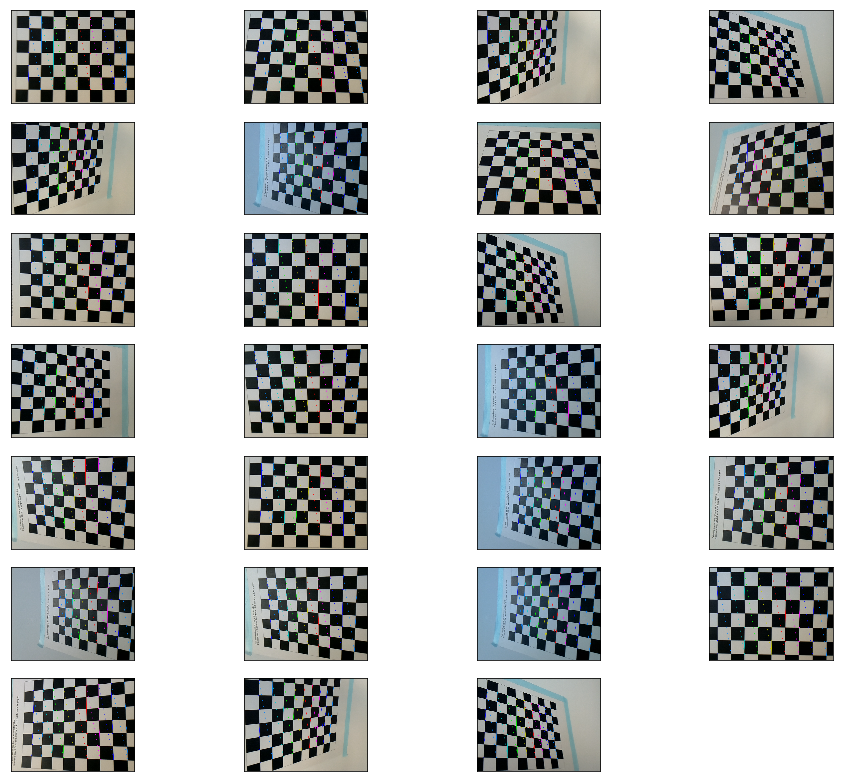

In [3]:
imgSize = (1296, 972)

calChessboardPattern = (7, 9)
calImgsPath = glob.glob("./rpi-cam-calibration-images/2/cam-calibration-images/*.png")

objPoints = []
imgPoints = []

objPt = np.zeros((calChessboardPattern[0] * calChessboardPattern[1], 3), np.float32)
objPt[:, :2] = np.mgrid[0:calChessboardPattern[0], 0:calChessboardPattern[1]].T.reshape(-1, 2)

fig = plt.figure(figsize=(16, 14))
# fig.suptitle("Part of sample chessboard images for camera calibration", fontsize=32)
columns = 4
rows = 7
i = 1

for image in calImgsPath:
    calImg = cv2.imread(image)
    ret, corners = cv2.findChessboardCorners(calImg, calChessboardPattern)
    
    if ret:
        imgPoints.append(corners)
        objPoints.append(objPt)
        cv2.drawChessboardCorners(calImg, calChessboardPattern, corners, ret)
        if i <= rows * columns:
            sub_i = fig.add_subplot(rows, columns, i)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(calImg,  cmap='gray')
            i += 1
        else:
            break
plt.show()

In [4]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, imgSize, None, None)

In [5]:
print("Camera matrix: \n", cameraMatrix)
print("\nDistortion coefficients: \n", distCoeffs)
optimAlpha = 1
optimCameraMatrix, cameraROI = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoeffs, imgSize, optimAlpha)
print("Optimal camera matrix: \n", optimCameraMatrix)
print("\nRegion of interest:\n", cameraROI)

Camera matrix: 
 [[1.56736255e+03 0.00000000e+00 6.29402913e+02]
 [0.00000000e+00 1.56225388e+03 4.41198663e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Distortion coefficients: 
 [[ 1.17753671e-01 -5.48692893e-01  2.96021388e-03 -4.76844674e-04
   5.88048405e-01]]
Optimal camera matrix: 
 [[1.57144202e+03 0.00000000e+00 6.28653387e+02]
 [0.00000000e+00 1.56695056e+03 4.42948721e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

Region of interest:
 (3, 2, 1290, 967)


In [6]:
def undistortImage(img):
    imgUndistRaw = imgUndist = cv2.undistort(img, cameraMatrix, distCoeffs, None, optimCameraMatrix)
    x, y, w, h = cameraROI
    x, y, w, h = int(x), int(y), int(w), int(h)
    imgUndistCrop = imgUndist[y:y + h, x:x + w]
    imgUndistScaled = cv2.resize(imgUndistCrop, imgSize)
    return imgUndistScaled, imgUndistCrop, imgUndistRaw

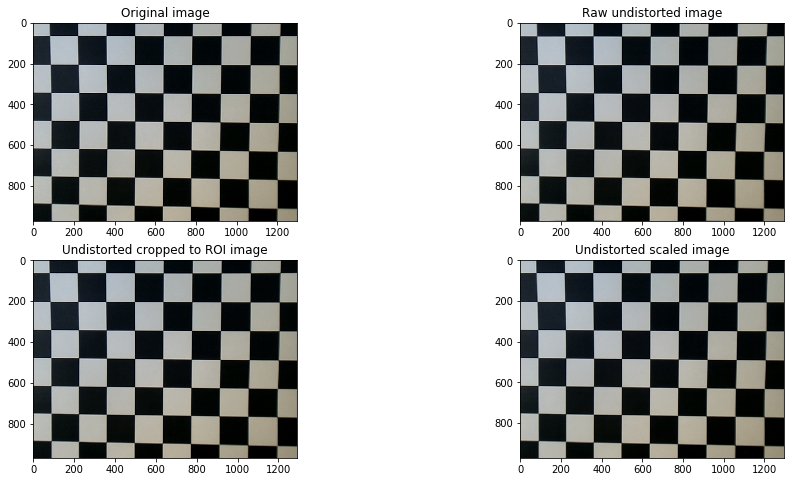

In [7]:
testImg = cv2.imread("./rpi-cam-calibration-images/2/cam-calibration-images/IMG_20191016_234740.png")
testUndistScaled, testUndistCrop, testUndistRaw = undistortImage(testImg)
fig = plt.figure(figsize=(16, 8))

sub1 = fig.add_subplot(2, 2, 1)
sub1.set_title("Original image")
plt.imshow(testImg)

sub2 = fig.add_subplot(2, 2, 2)
sub2.set_title("Raw undistorted image")
plt.imshow(testUndistRaw)

sub3 = fig.add_subplot(2, 2, 3)
sub3.set_title("Undistorted cropped to ROI image")
plt.imshow(testUndistCrop)
           
sub4 = fig.add_subplot(2, 2, 4)
sub4.set_title("Undistorted scaled image")
plt.imshow(testUndistScaled)